# Transfer Learning, from dogs and cats  to Pneumonia 

   So we have all the different models floating around the web. WE have all heard about the Alexnet, VGG, Resnet, Inception and so on. they were all designed to find cats and dogs and toothbrushes, but how many times do we look for that in real life ? 

In real life one needs to download a known neural network and use transfer learning to apply it to his/her problem. This generally means to cut of the last fully connected layers at the end and add others that are fit for the problem. 

Below please how this transfer learning would like: 

<img src="images/transfer.png">



## Pneumonia

Source : Wikipedia

Pneumonia is an inflammatory condition of the lung affecting primarily the small air sacs known as alveoli. Typically symptoms include some combination of productive or dry cough, chest pain, fever, and trouble breathing. Severity is variable.

Vaccines to prevent certain types of pneumonia are available.Other methods of prevention include handwashing and not smoking.Treatment depends on the underlying cause. Pneumonia believed to be due to bacteria is treated with antibiotics. If the pneumonia is severe, the affected person is generally hospitalized. Oxygen therapy may be used if oxygen levels are low.

Pneumonia affects approximately 450 million people globally (7% of the population) and results in about 4 million deaths per year.

In 2008, pneumonia occurred in approximately 156 million children (151 million in the developing world and 5 million in the developed world).In 2010, it resulted in 1.3 million deaths, or 18% of all deaths in those under five years, of which 95% occurred in the developing world.

<img src="images/deaths.png">


## The Data 

The data for the lab is downloaded from  Kaggle (https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia) and it contains 5863 images taken from pediatric patients from 1 to 5 years old.  the images are labelled by specialists in two classes: Normal and Pneumonia. 

<img src="images/dataset.png">


The initial dataset was actually published here:  [Mendeley Data - Chest X-Ray Images](https://data.mendeley.com/datasets/rscbjbr9sj/2) 

## The Lab

Lets train a neural network to recognize the Pneumonia from the normal cases. 

We will start by loading the necessary libraries. 

In [1]:
import os
import shutil
import glob
import urllib.request

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf 
from tensorflow.python.framework import ops
ops.reset_default_graph()


Let's see what the data actually holds. We see three directories: the test, train and the validaton sets

In [3]:
 glob.glob('C:/Users/Muaad Asif/Desktop/chest-xray-pneumonia/chest_xray/chest_xray/*/*')

['C:/Users/Muaad Asif/Desktop/chest-xray-pneumonia/chest_xray/chest_xray\\test\\NORMAL',
 'C:/Users/Muaad Asif/Desktop/chest-xray-pneumonia/chest_xray/chest_xray\\test\\PNEUMONIA',
 'C:/Users/Muaad Asif/Desktop/chest-xray-pneumonia/chest_xray/chest_xray\\train\\NORMAL',
 'C:/Users/Muaad Asif/Desktop/chest-xray-pneumonia/chest_xray/chest_xray\\train\\PNEUMONIA',
 'C:/Users/Muaad Asif/Desktop/chest-xray-pneumonia/chest_xray/chest_xray\\val\\NORMAL',
 'C:/Users/Muaad Asif/Desktop/chest-xray-pneumonia/chest_xray/chest_xray\\val\\PNEUMONIA']

Below let's look at the data and vizualise some images: either normal or pneumonia 

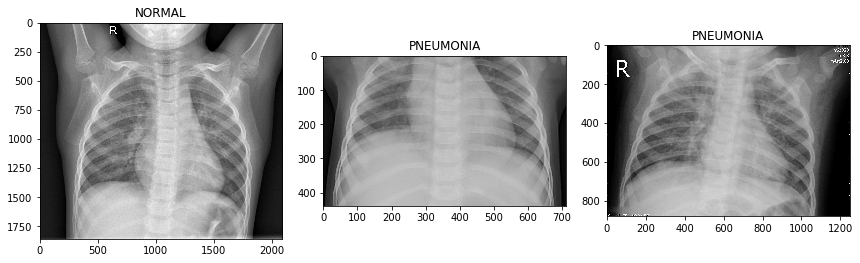

In [4]:
img_normal = plt.imread('C:/Users/Muaad Asif/Desktop/chest-xray-pneumonia/chest_xray/chest_xray/train/NORMAL/IM-0115-0001.jpeg')
img_penumonia_bacteria = plt.imread('C:/Users/Muaad Asif/Desktop/chest-xray-pneumonia/chest_xray/chest_xray/train/PNEUMONIA/person1_bacteria_1.jpeg')
img_penumonia_virus = plt.imread('C:/Users/Muaad Asif/Desktop/chest-xray-pneumonia/chest_xray/chest_xray/train/PNEUMONIA/person80_virus_150.jpeg')

plt.figure(figsize=(12, 5))

plt.subplot(1,3,1).set_title('NORMAL')
plt.imshow(img_normal, cmap='gray')

plt.subplot(1,3,2).set_title('PNEUMONIA')
plt.imshow(img_penumonia_bacteria, cmap='gray')

plt.subplot(1,3,3).set_title('PNEUMONIA')
plt.imshow(img_penumonia_virus, cmap='gray')

plt.tight_layout()

We have to  build the dataset to ingest into our neural network. We need to sets. X and Y: 
* X should be the list of all images, each entry being a path to the a file
* Y should be either 0 or 1. 0 if the image contains a Normal patient and 1 if the image contains a PNEUMONIA infested patient. 

In [5]:
def get_labeled_files(folder):
    x = []
    y = []
    
    for folderName in os.listdir(folder):
        if not folderName.startswith('.'):
            if folderName in ['NORMAL']:
                label = 0
            elif folderName in ['PNEUMONIA']:
                label = 1
            else:
                label = 2
                continue # we do not investigate other dirs
            for image_filename in os.listdir(folder + folderName):
                img_path = folder + folderName + '/' + image_filename
                if img_path is not None and str.endswith(img_path, 'jpeg'):
                    x.append(img_path)
                    y.append(label)
    
    x = np.asarray(x)
    y = np.asarray(y)
    return x, y

Now lets see some examples of what we have just done. 

In [6]:
x, y = get_labeled_files('C:/Users/Muaad Asif/Desktop/chest-xray-pneumonia/chest_xray/chest_xray/train/')
list(zip(x, y))[:10]

[('C:/Users/Muaad Asif/Desktop/chest-xray-pneumonia/chest_xray/chest_xray/train/NORMAL/IM-0115-0001.jpeg',
  0),
 ('C:/Users/Muaad Asif/Desktop/chest-xray-pneumonia/chest_xray/chest_xray/train/NORMAL/IM-0117-0001.jpeg',
  0),
 ('C:/Users/Muaad Asif/Desktop/chest-xray-pneumonia/chest_xray/chest_xray/train/NORMAL/IM-0119-0001.jpeg',
  0),
 ('C:/Users/Muaad Asif/Desktop/chest-xray-pneumonia/chest_xray/chest_xray/train/NORMAL/IM-0122-0001.jpeg',
  0),
 ('C:/Users/Muaad Asif/Desktop/chest-xray-pneumonia/chest_xray/chest_xray/train/NORMAL/IM-0125-0001.jpeg',
  0),
 ('C:/Users/Muaad Asif/Desktop/chest-xray-pneumonia/chest_xray/chest_xray/train/NORMAL/IM-0127-0001.jpeg',
  0),
 ('C:/Users/Muaad Asif/Desktop/chest-xray-pneumonia/chest_xray/chest_xray/train/NORMAL/IM-0128-0001.jpeg',
  0),
 ('C:/Users/Muaad Asif/Desktop/chest-xray-pneumonia/chest_xray/chest_xray/train/NORMAL/IM-0129-0001.jpeg',
  0),
 ('C:/Users/Muaad Asif/Desktop/chest-xray-pneumonia/chest_xray/chest_xray/train/NORMAL/IM-0131-0

As the Dataset has been matched we need to read and decode the jpeg files. we are doing that with the function below. Once that is done we need to also resize the images to something that our VGG16 can actually understand. 

In [7]:
NUM_CLASSES = 2

# This function takes image paths as arguments and reads corresponding images
def input_parser(img_path, label):
    # convert the label to one-hot encoding
    one_hot = tf.one_hot(label, NUM_CLASSES)
    # read the img from file and decode it using tf
    img_file = tf.read_file(img_path)
    img_decoded = tf.image.decode_jpeg(img_file, channels=3, name="decoded_images")
    return img_decoded, one_hot

# This function takes image and resizes it to smaller format (150x150)
def image_resize(images, labels):
    # Be very careful with resizing images like this and make sure to read the doc!
    # Otherwise, bad things can happen - https://hackernoon.com/how-tensorflows-tf-image-resize-stole-60-days-of-my-life-aba5eb093f35
    resized_image = tf.image.resize_images(images, (150, 150), align_corners=True)
    resized_image_asint = tf.cast(resized_image, tf.int32)
    return resized_image_asint, labels    

Create the pipeline in TF, moving from images to tensors. 

In [8]:
# Execution plan is defined here.
# Since it uses lazy evaluation, the images will not be read after calling build_pipeline_plan()
# We need to use iterator defined here in tf context
def build_pipeline_plan(img_paths, labels, batch_size):

    # We build a tensor of image paths and labels
    tr_data = tf.data.Dataset.from_tensor_slices((img_paths, labels))
    # First step of input pipeline - read images in paths as jpegs
    tr_data_imgs = tr_data.map(input_parser)
    # Apply resize to each image in the pipeline
    tr_data_imgs = tr_data_imgs.map(image_resize)
    # Gives us opportuinty to batch images into small groups
    tr_dataset = tr_data_imgs.batch(batch_size)
    # create TensorFlow Iterator object directly from input pipeline
    iterator = tr_dataset.make_one_shot_iterator()
    next_element = iterator.get_next()
    return next_element

# Function to execute defined pipeline in Tensorflow session
def process_pipeline(next_element):
    gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.333)
    with tf.Session(config=tf.ConfigProto(gpu_options=gpu_options)) as sess:
        # get each element of the training dataset until the end is reached
        # in our case only one iteration since we read everything as 1 batch
        # can be multiple iterations if we decrease BATCH_SIZE to eg. 10
        images = []
        labels_hot = []
        while True:
            try:
                elem = sess.run(next_element)
                images = elem[0]
                labels_hot = elem[1]
            except tf.errors.OutOfRangeError:
                print("Finished reading the dataset")
                return images, labels_hot

Load the dataset and return it into images and labels. 

In [11]:
def load_dataset(path, batch_size):
    tf.reset_default_graph()
    files, labels = get_labeled_files(path)
    p = tf.constant(files, name="train_imgs")
    l = tf.constant(labels, name="train_labels")
    
    next_element = build_pipeline_plan(p, l, batch_size=batch_size)
    imgs, labels = process_pipeline(next_element)
    return imgs, labels

Lets check what we have done.

In [19]:
x_train, y_train = load_dataset("C:/Users/Muaad Asif/Desktop/chest-xray-pneumonia/chest_xray/chest_xray/train/", 600)
x_test, y_test = load_dataset("C:/Users/Muaad Asif/Desktop/chest-xray-pneumonia/chest_xray/chest_xray/test/", 600)
x_val, y_val = load_dataset("C:/Users/Muaad Asif/Desktop/chest-xray-pneumonia/chest_xray/chest_xray/val/", 600)

Finished reading the dataset
Finished reading the dataset
Finished reading the dataset


Print the different sizes of the datasets. How images we have in each. 

In [20]:
print("Training Dataset")
print(x_train.shape)
print(y_train.shape)
print("\nTesting Dataset")
print(x_test.shape)
print(y_test.shape)
print("\n Validation  Dataset")
print(x_val.shape)
print(y_val.shape)

Training Dataset
(416, 150, 150, 3)
(416, 2)

Testing Dataset
(24, 150, 150, 3)
(24, 2)

 Validation  Dataset
(16, 150, 150, 3)
(16, 2)


Lets calculate what we have in each Dataset. 

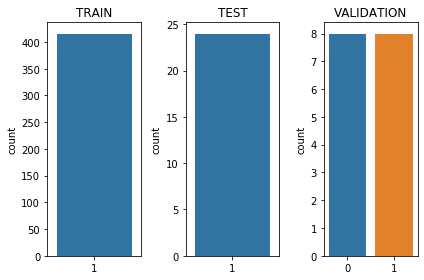

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns 

plt.subplot(1,3,1)
sns.countplot(np.argmax(y_train, axis=1)).set_title('TRAIN')

plt.subplot(1,3,2)
sns.countplot(np.argmax(y_test, axis=1)).set_title('TEST')

plt.subplot(1,3,3)
sns.countplot(np.argmax(y_val, axis=1)).set_title('VALIDATION')

plt.tight_layout()


Final investigation. Lets see what we have before we start training.

(416, 150, 150, 3)


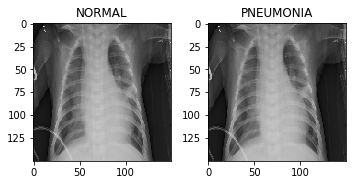

In [22]:
print(x_train.shape)

plt.figure(figsize=(5, 3))

y_train_classes = np.argmax(y_train, axis = 1)

plt.subplot(1,2,1).set_title('NORMAL')
plt.imshow(x_train[np.argmax(y_train_classes == 0)])

plt.subplot(1,2,2).set_title('PNEUMONIA')
plt.imshow(x_train[np.argmax(y_train_classes == 1)])

plt.tight_layout()

## the Neural Network 

As we have shown that we are working with the original data and we have worked it into something usable in Tensorflow now it is time to take it from the very beginning and start with downloading the VGG16 network. 

the VGG16 network contains the weights trained for solving the ImageNet challange. 



<img src="images/vgg16.png">

Next, we'll replace the orignal classification layer and build a new one:)

It will be composed of:

- Flatten transformation that reshapes the MaxPool output (4 x 4 x 512) into (1 x 1 x 8192)
- Fully Connected Dense layer with Softmax activation function with 2 outputs (1 x 1 x 2)

Softmax function normalizes input vector into a probability distribution that sums to 1.0

In [23]:
import keras
from keras import backend as K
from keras.models import Model
from keras.layers import Flatten, Dense, BatchNormalization, Dropout
from keras.applications.vgg16 import VGG16
#from keras.applications.vgg19 import VGG19
#from keras.applications.densenet import DenseNet
from keras.applications.inception_v3 import InceptionV3

K.clear_session()

NUM_CLASSES = 2

base_model = VGG16(weights='../input/vgg16/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5', include_top=False, input_shape=(150, 150, 3))
#base_model = VGG19(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
#base_model = DenseNet(blocks=10, weights='imagenet', include_top=False, input_shape=(150, 150, 3))
#base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

x = base_model.output
x = Flatten()(x)
x = Dense(NUM_CLASSES, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=x)

model.summary()

ValueError: The `weights` argument should be either `None` (random initialization), `imagenet` (pre-training on ImageNet), or the path to the weights file to be loaded.

This network has over 14M trainable wegihts.

In [ ]:
def print_layers(model):
    for idx, layer in enumerate(model.layers):
        print("layer {}: {}, trainable: {}".format(idx, layer.name, layer.trainable))

We would like to train only the most bottom classifier layers.

In [ ]:
for layer in model.layers[0:18]:
    layer.trainable = False
    
print_layers(model)

In [ ]:
model.trainable_weights

By locking the trainable layers we decrease ammount of trainable parameters to 16'384.

Here we use the "cross-entropy" loss function, which works well for learning probability distributions for classification. 

See e.g.: https://ml-cheatsheet.readthedocs.io/en/latest/loss_functions.html#cross-entropy

In [ ]:
import numpy as np
import keras.backend as K
from itertools import product
from functools import partial

In [ ]:
def w_categorical_crossentropy(y_true, y_pred, weights):
    nb_cl = len(weights)
    final_mask = K.zeros_like(y_pred[:, 0])
    y_pred_max = K.max(y_pred, axis=1)
    y_pred_max = K.reshape(y_pred_max, (K.shape(y_pred)[0], 1))
    y_pred_max_mat = K.cast(K.equal(y_pred, y_pred_max), K.floatx())
    for c_p, c_t in product(range(nb_cl), range(nb_cl)):
        final_mask += (weights[c_t, c_p] * y_pred_max_mat[:, c_p] * y_true[:, c_t])
    return K.categorical_crossentropy(y_pred, y_true) * final_mask


w_array = np.ones((2,2))
w_array[1,0] = 30 # penalizing FN
w_array[0,1] = 1 # penalizing FP

spec_loss = lambda y_true, y_pred: w_categorical_crossentropy(y_true, y_pred, weights=w_array)

In [ ]:
# Create the loss function object using the wrapper function abov
optimizer = keras.optimizers.Adam(lr=0.0001)

model.compile(loss='categorical_crossentropy',     #  loss=spec_loss,
              optimizer=optimizer, 
              metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint, TensorBoard, ReduceLROnPlateau, EarlyStopping

# This callback saves the wieights of the model after each epoch
checkpoint = ModelCheckpoint(
    'model/weights.epoch_{epoch:02d}.hdf5',
    monitor='val_loss', 
    save_best_only=True, 
    save_weights_only=False,
    mode='auto',
    verbose=1
)

# This callback writes logs for TensorBoard
tensorboard = TensorBoard(
    log_dir='./Graph', 
    histogram_freq=0,  
    write_graph=True
)

The training set is un-balanaced. Let's calculate class weights

In [ ]:
from sklearn.utils import class_weight
y_labels = np.argmax(y_train, axis=1)
classweight = class_weight.compute_class_weight('balanced', np.unique(y_labels), y_labels)
print(classweight)

In [ ]:
# prepare a directory to store the model weights
os.makedirs('./model', exist_ok=True)

history = model.fit(
    x=x_train, y=y_train,
    class_weight=classweight,
    validation_split=0.3,
    callbacks=[tensorboard],
    shuffle=True,
    batch_size=256,
    epochs=60,
    verbose=1
)

In [ ]:
def plot_learning_curves(history):
    plt.figure(figsize=(12,4))
    
    plt.subplot(1,2,1)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    
    plt.subplot(1,2,2)
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    
    plt.tight_layout()
    
plot_learning_curves(history)

Measure Loss and Accuracy on the test dataset

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Model Loss: {}, Accuracy: {}'.format(score[0], score[1]))

## Looking at performance 

AS you have seen in the previous lab regarding Malaria there are a lot of alterntative of plotting and calculating the performance. In this case lets us ethe Confusion Matrix. 

In [ ]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

y_pred = model.predict(x_test)
# to get the prediction, we pick the class with with the highest probability
y_pred_classes = np.argmax(y_pred, axis = 1) 
y_true = np.argmax(y_test, axis = 1) 


conf_mtx = confusion_matrix(y_true, y_pred_classes) 
plot_confusion_matrix(conf_mtx, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.xticks(range(2), ['Normal', 'Pneumonia'], fontsize=16)
plt.yticks(range(2), ['Normal', 'Pneumonia'], fontsize=16)
plt.show()

... and ROC curve

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(NUM_CLASSES):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
                                 
plt.figure(figsize=(7, 5))

for i in range(NUM_CLASSES):
    plt.plot(fpr[i], tpr[i], lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))
    
plt.plot(fpr[0], fpr[0], 'k-', label = 'random guessing')

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc="lower right")

plt.tight_layout()

**Excercise 3.1.** We would like to achive a better performance on the test dataset. Try tuning hyperparameters i.e. learning rate. Can you reach better accuracy?

**Excercise 3.2.** Try to use another base network i.e. InceptionV3, ResNet50, DenseNet.

What do you observe? Is training time different? How many parameters does the function have?

**Excercise 3.3.** Try training some of the conv layers. Does this help?

**Excercise 3.4.** can you think about a better metric than accuracy, which captures the fact that false negatives are much (much) worse than false positives?